<h3 style="color:teal">Importing Libraries</h3>

In [1]:
import pandas as pd # for reading the file and preprocessing
import numpy as np # for mathematical and statistical calculations
import matplotlib.pyplot as plt # for visualizing
import seaborn as sns # for visualizing
from sklearn.preprocessing import LabelEncoder, StandardScaler # for encoding integer values to objects

<h3 style="color:seagreen">Reading the File</h3>

In [2]:
file=pd.read_csv('ipl_matches.csv')
print("File read successfully")

File read successfully


<h3 style="color:indigo">Getting file information</h3>

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

<pre>This dataset consists of <b>1095 rows and 20 columns</b>,and has information about <b>Indian Premier League</b> matches held until end of 2024 season. It contains 16 object datatype , 3 float64 and 1 int64 columns.Total size of file is 171.2+KB approximately. This dataset has 7 columns out of 20 having null values.</pre>

In [4]:
file.head() ## getting first five rows

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
file.tail() # getting last five rows

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


<h3 style="color:orange">Working with Dataframe</h3>

In [6]:
# Converting date column dtype to date-time format
file['year']=pd.to_datetime(file['date'])
file.drop('date',axis=1,inplace=True)

In [7]:
# extracting season as new feature
file['season']=file['year'].dt.year # dt is an object , year is reference to it
file.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year
0,335982,2008,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008-04-18
1,335983,2008,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,2008-04-19
2,335984,2008,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,2008-04-19
3,335985,2008,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,2008-04-20
4,335986,2008,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,2008-04-20


In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   int32         
 2   city             1044 non-null   object        
 3   match_type       1095 non-null   object        
 4   player_of_match  1090 non-null   object        
 5   venue            1095 non-null   object        
 6   team1            1095 non-null   object        
 7   team2            1095 non-null   object        
 8   toss_winner      1095 non-null   object        
 9   toss_decision    1095 non-null   object        
 10  winner           1090 non-null   object        
 11  result           1095 non-null   object        
 12  result_margin    1076 non-null   float64       
 13  target_runs      1092 non-null   float64       
 14  target_overs     1092 non-null   float64

<h3 style="color:cyan">Handling Null Values</h3>

In [9]:
file['city']=file['city'].fillna('Unknown')
file['winner']=file['winner'].fillna('Unknown')
file['result_margin']=file['result_margin'].fillna('Unknown')
file['target_runs']=file['target_runs'].fillna(file['target_runs'].mean())
file['target_overs']=file['target_overs'].fillna(file['target_overs'].mean())
file['method']=file['method'].fillna('N')
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1095 non-null   int64         
 1   season           1095 non-null   int32         
 2   city             1095 non-null   object        
 3   match_type       1095 non-null   object        
 4   player_of_match  1090 non-null   object        
 5   venue            1095 non-null   object        
 6   team1            1095 non-null   object        
 7   team2            1095 non-null   object        
 8   toss_winner      1095 non-null   object        
 9   toss_decision    1095 non-null   object        
 10  winner           1095 non-null   object        
 11  result           1095 non-null   object        
 12  result_margin    1095 non-null   object        
 13  target_runs      1095 non-null   float64       
 14  target_overs     1095 non-null   float64

<h3 style="color:violet">Encoding Columns</h3>

In [10]:
# encoding toss_winner,toss_decision,winner,result columns as they contain categorical values

In [11]:
le_2=LabelEncoder()
le_4=LabelEncoder()
le_5=LabelEncoder()
file['toss_decision']=le_2.fit_transform(file['toss_decision'])
file['result']=le_4.fit_transform(file['result'])
file['super_over']=le_5.fit_transform(file['super_over'])

In [12]:
file.head()

,id,season,city,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year
0,335982,2008,Bangalore,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,1,Kolkata Knight Riders,1,140.0,223.0,20.0,0,N,Asad Rauf,RE Koertzen,2008-04-18
1,335983,2008,Chandigarh,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,0,Chennai Super Kings,1,33.0,241.0,20.0,0,N,MR Benson,SL Shastri,2008-04-19
2,335984,2008,Delhi,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,0,Delhi Daredevils,3,9.0,130.0,20.0,0,N,Aleem Dar,GA Pratapkumar,2008-04-19
3,335985,2008,Mumbai,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,0,Royal Challengers Bangalore,3,5.0,166.0,20.0,0,N,SJ Davis,DJ Harper,2008-04-20
4,335986,2008,Kolkata,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,0,Kolkata Knight Riders,3,5.0,111.0,20.0,0,N,BF Bowden,K Hariharan,2008-04-20


In [13]:
top_teams=file['winner'].value_counts().nlargest(10)
print(top_teams)

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Name: count, dtype: int64


<h3 style="color:chocolate">Top 10 teams with most wins</h3>

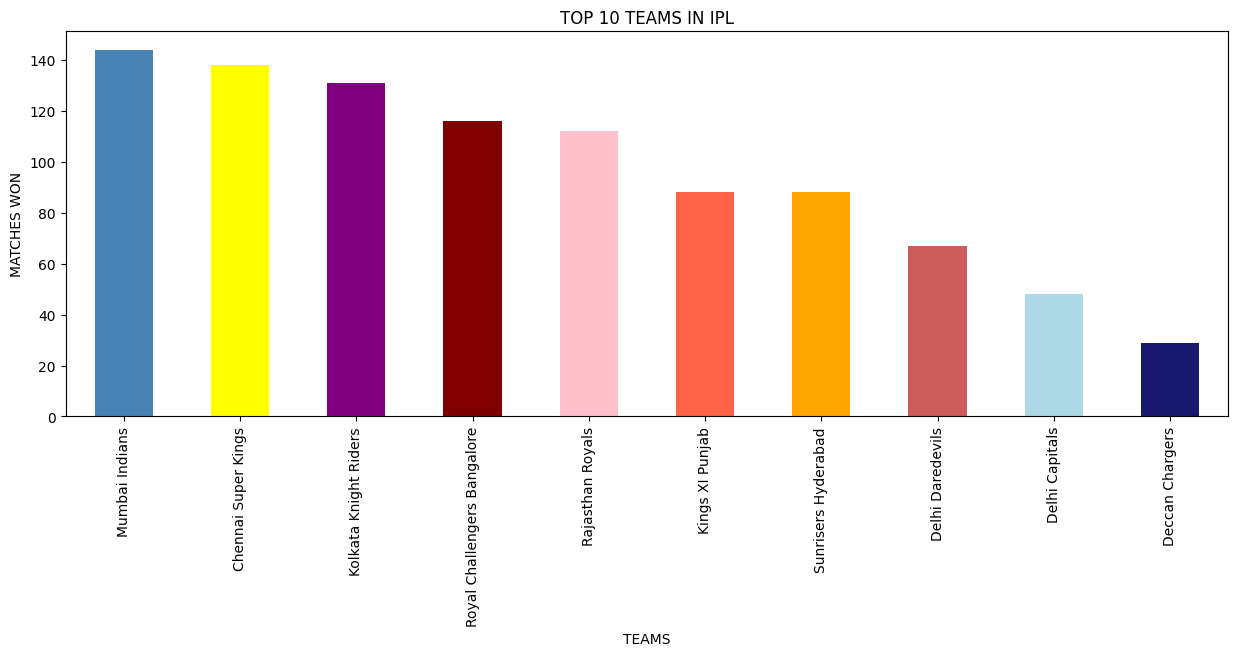

In [14]:
colors=['steelblue','yellow','purple','maroon','pink','tomato','orange','indianred','lightblue','midnightblue']
plt.figure(figsize=(15,5))
top_teams.plot(kind='bar',color=colors)
plt.title("TOP 10 TEAMS IN IPL")
plt.xlabel("TEAMS")
plt.ylabel("MATCHES WON")
plt.show()